### Checking Variance Calculations ###

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [46]:
biol = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_month_variance_biology__20150101_20150131.nc')
biol_mean = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20150101_20150131.nc')
biol_ts = xr.open_dataset('/home/sallen/MEOPAR/Karyn_Reshapr/SalishSeaCast_timeseries_biology_20150101_20150131.nc')

0.009538564
1.3671067e-05


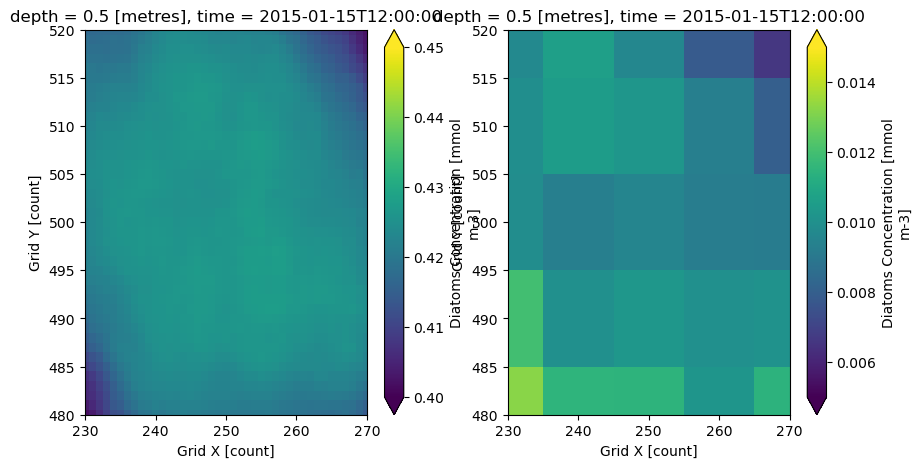

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
biol_mean.diatoms[0, 0].plot(ax=axs[0], vmax=0.45, vmin=0.4)
biol.diatoms[0, 0].plot(ax=axs[1], vmax=0.015, vmin=0.005);
for ax in axs:
    ax.set_ylim(480, 520)
    ax.set_xlim(230, 270)
print (biol.diatoms[0, 0, 50, 25].values)
print (biol_mean.diatoms[0, 0, 480:520, 230:270].var().values)

0.00953857


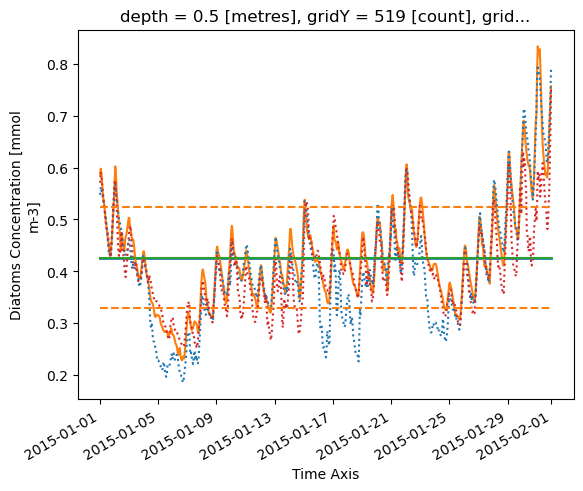

In [83]:
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], biol_mean.diatoms[0, 0, 500, 250].mean().values * np.ones((2)), linewidth=2)
biol_ts.diatoms[:, 0, 20, 20].plot();
biol_ts.diatoms[:, 0, 0, 0].plot(linestyle=':', c='tab:blue');
biol_ts.diatoms[:, 0, 39, 39].plot(linestyle=':', c='tab:red');
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], biol_ts.diatoms[:, 0, 20, 20].mean().values * np.ones((2)))
variance = biol_ts.diatoms[:, 0, 20, 20].var().values
print (variance)
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], (biol_ts.diatoms[:, 0, 20, 20].mean().values
                                                             + np.sqrt(variance))* np.ones((2)), '--', c='tab:orange')
plt.plot([biol_ts.time[0].values, biol_ts.time[-1].values], (biol_ts.diatoms[:, 0, 20, 20].mean().values
                                                             - np.sqrt(variance))* np.ones((2)), '--', c='tab:orange');

In [163]:
zvars =  biol_ts.diatoms[:, 0].values.var() # total variance
var_through_time = biol_ts.diatoms[:, 0].var(axis=0)  # variance through time
mean_var_through_time = var_through_time.mean()
time_means = biol_ts.diatoms[:, 0].mean(axis=0)
variance_time_means = time_means.values.var()

In [165]:
print (f'total variance = {zvars}')
print (f'time variance = {mean_var_through_time.values}') # variance in time, averaged over space
print (f'time variance (coarse) = {biol.diatoms[0, 0, 48:53, 23:28].mean().values}') # variance in time, averaged over space
print (f'space variance = {variance_time_means}') # averaged over time, variance over space
print (f'space variance (from month file) = {biol_mean.diatoms[0, 0, 480:520, 230:270].values.flatten().var()}') # variance in space, averaged over time
print (f'total variance as sum = {(mean_var_through_time.values + variance_time_means)}')

total variance = 0.009963304735720158
time variance = 0.009949633851647377
time variance (coarse) = 0.009974590502679348
space variance = 1.3671135093318298e-05
space variance (from month file) = 1.3671066881215665e-05
total variance as sum = 0.009963304735720158


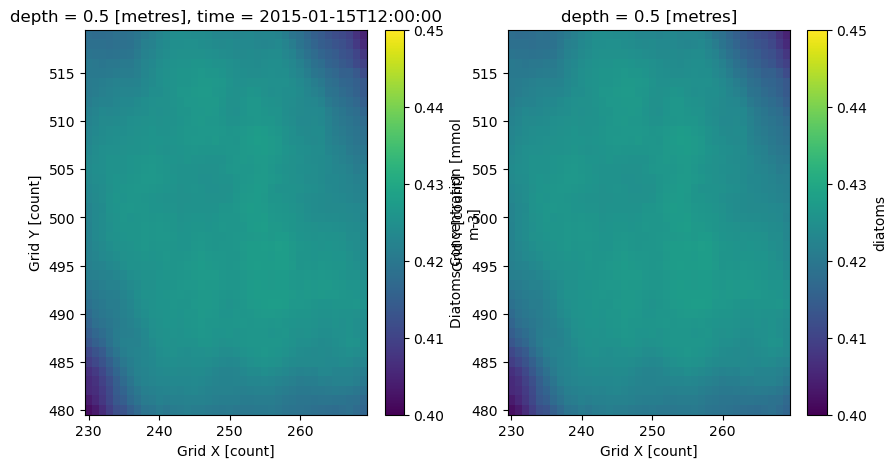

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
biol_mean.diatoms[0, 0, 480:520, 230:270].plot(ax=axs[0], vmax=0.45, vmin=0.4)
(biol_ts.diatoms[:, 0].mean(axis=0)).plot(ax=axs[1], vmax=0.45, vmin=0.4)

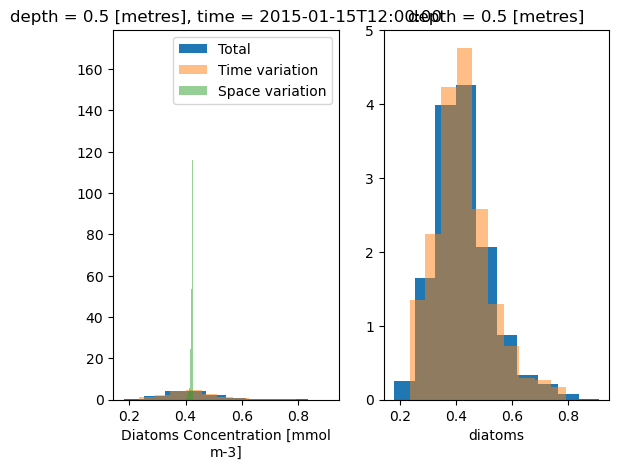

In [168]:
fig, axs = plt.subplots(1, 2)
for ax in axs:
    biol_ts.diatoms[:, 0].plot(ax=ax, density=True, label='Total');  # total distribution
    biol_ts.diatoms[:, 0].mean(axis=2).mean(axis=1).plot.hist(ax=ax, density=True, alpha=0.5, label='Time variation'); # variation in the space means across time
    
biol_mean.diatoms[0, 0, 480:520, 230:270].plot.hist(ax=axs[0], density=True, alpha=0.5, label='Space variation'); # variation in the temporal means across space
axs[0].legend();